In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
#sklearn.datasets.make_classification(n_samples=10,n_features=20, n_classes=2)
#sklearn.datasets.make_blobs()

In [3]:
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','ViolentCrimesPerPop']
df = pd.read_csv('crimedata.csv', usecols=cols)
df.head()
sample_mean = []
df.replace(
    to_replace=['?'],
    value=np.nan,
    inplace=True
)
#for i in range(len(cols)):

mean = 0
'''for i in range(len(cols)):
    value = 0
    j = 0
    for index, rows in df.iterrows():
        if(rows[cols[i]] != np.nan):
            value = value + float(rows[cols[i]])
            print rows[cols[i]]
        j = j + 1
    mean = float(value/j)
    #mean = mean.astype(str)
    df[cols[i]].replace(
    to_replace=['?'],
    value=str(mean),
    inplace=True
)
'''
df = df.apply(pd.to_numeric)
#imp = Imputer(missing_values=np.nan,   strategy='mean', axis=0)
#print imp.fit(df)
#print imp.transform(df)
df.fillna(df.mean(), inplace=True)
df.info()

df.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 8 columns):
PctUnemployed          2215 non-null float64
PctEmploy              2215 non-null float64
HousVacant             2215 non-null int64
PctHousOccup           2215 non-null float64
PctHousOwnOcc          2215 non-null float64
PctVacantBoarded       2215 non-null float64
PctVacMore6Mos         2215 non-null float64
ViolentCrimesPerPop    2215 non-null float64
dtypes: float64(7), int64(1)
memory usage: 138.5 KB


,PctUnemployed,PctEmploy,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,ViolentCrimesPerPop
0,2.70,64.55,64,98.37,91.01,3.12,37.50,41.020000
1,2.43,61.96,240,97.15,84.88,0.00,18.33,127.560000
2,4.01,69.80,544,95.68,57.79,0.92,7.54,218.590000
3,9.86,54.74,669,91.19,54.89,2.54,57.85,306.640000
4,9.08,52.44,333,92.45,53.57,3.90,42.64,589.078922


In [4]:
#ViolentCrimesPerPop
Y = df['ViolentCrimesPerPop']

df = df.drop('ViolentCrimesPerPop', axis=1)
df.head()

,PctUnemployed,PctEmploy,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos
0,2.70,64.55,64,98.37,91.01,3.12,37.50
1,2.43,61.96,240,97.15,84.88,0.00,18.33
2,4.01,69.80,544,95.68,57.79,0.92,7.54
3,9.86,54.74,669,91.19,54.89,2.54,57.85
4,9.08,52.44,333,92.45,53.57,3.90,42.64


In [5]:
linearRegression = LinearRegression()
score = 0
rss = 0
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.2)
    model = linearRegression.fit(X_train, Y_train)
    linearRegression.get_params()
    print linearRegression.score(X_test, Y_test)
    rss = rss + np.mean((Y_test-linearRegression.predict(X_test))**2)
    print rss
    
print float(rss/5.0)

0.374538191236
229223.22956
0.234129813693
496357.131238
0.414292885174
717451.09334
0.393588507146
928150.595839
0.187222520341
1118135.00344
223627.000689


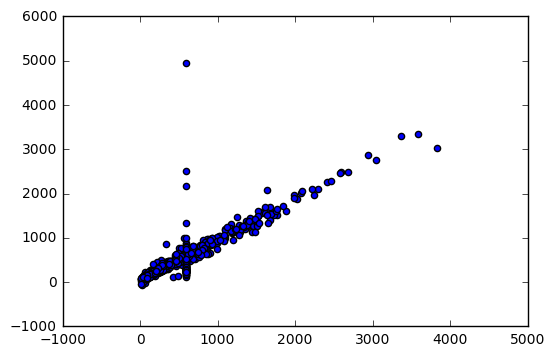

In [113]:
plt.scatter(Y_test, linearRegression.predict(X_test))
plt.show()

In [103]:
print Y_test.mean()

564.161302833
